In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
from sklearn.datasets import load_boston


In [10]:
boston=load_boston()

In [12]:
bos=pd.DataFrame(boston.data)

In [14]:
print(bos.head)
print(boston.feature_names)

<bound method NDFrame.head of           0     1      2    3      4      5     6       7    8      9     10  \
0    0.00632  18.0   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1    0.02731   0.0   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2    0.02729   0.0   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3    0.03237   0.0   2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4    0.06905   0.0   2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   
..       ...   ...    ...  ...    ...    ...   ...     ...  ...    ...   ...   
501  0.06263   0.0  11.93  0.0  0.573  6.593  69.1  2.4786  1.0  273.0  21.0   
502  0.04527   0.0  11.93  0.0  0.573  6.120  76.7  2.2875  1.0  273.0  21.0   
503  0.06076   0.0  11.93  0.0  0.573  6.976  91.0  2.1675  1.0  273.0  21.0   
504  0.10959   0.0  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0  21.0   
505  0.04741   0.0  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0  21.0   

         

In [17]:
bos['PRICE']=boston.target

In [18]:
Y=bos['PRICE']
X=bos.drop('PRICE',axis=1)

In [20]:
print(X.head())
print(Y.head())

         0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64


In [21]:
from sklearn.linear_model import LinearRegression
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y,test_size=0.33,random_state=5)

In [22]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(339, 13) (167, 13) (339,) (167,)


In [23]:
lm=LinearRegression()

In [26]:
lm.fit(X_train, Y_train)

LinearRegression()

In [27]:
Y_pred = lm.predict(X_test)

In [33]:
df=pd.DataFrame(Y_pred, Y_test)
print(df)

               0
PRICE           
37.6   37.467236
27.9   31.391547
22.6   27.120196
13.8    6.468433
35.2   33.629667
...          ...
14.4    9.718369
35.4   34.705200
25.3   25.704102
18.3   20.154309
16.6   15.394658

[167 rows x 1 columns]


In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
print(mse,mae)

28.530458765974675 3.4550349322483545


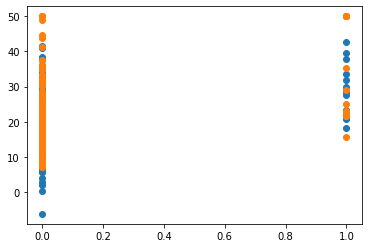

In [41]:
plt.scatter(X_test[3],Y_pred)
plt.scatter(X_test[3],Y_test)
plt.show()

In [44]:
#task 2 logistic regression
dataset=pd.read_csv('Social_Network_Ads.csv')

In [45]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [47]:
X=dataset.iloc[:,[2,3]].values
Y=dataset.iloc[:,4].values
print(X[0:5])

[[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y,test_size=0.25,random_state=0)
#feature scaling is important, something ranges in 1000s somethni gin 10s, so we need a uniform thing... thats like activation function only right? min max std or sigmoid?

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train[0:5,]

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358]])

In [62]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [65]:
Y_test_pred = classifier.predict(X_test)
df=pd.DataFrame(Y_test_pred, Y_test)
print(df)

    0
0   0
0   0
0   0
0   0
0   0
.. ..
1   0
0   0
1   0
1   1
1   1

[100 rows x 1 columns]


In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_test_pred)
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)